In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
print(tf.__version__)

1.15.0


In [14]:
fashion = keras.datasets.fashion_mnist

In [16]:
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

In [32]:
train_images.shape

(60000, 28, 28)

In [18]:
train_labels.shape

(60000,)

In [19]:
test_images.shape

(10000, 28, 28)

In [58]:
class_names = ['Tshirts/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [59]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

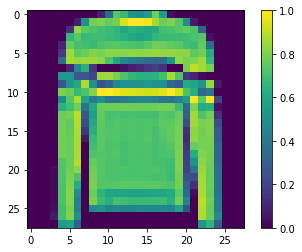

In [60]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [61]:
train_images = train_images/255
test_images = test_images/255

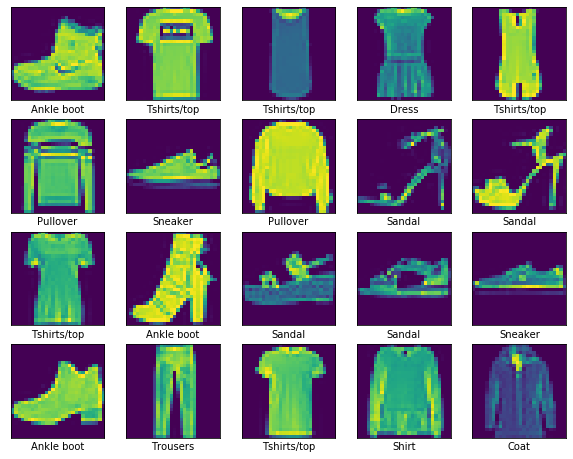

In [62]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [64]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [65]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [66]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 1.0986 - acc: 0.6646
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.6449 - acc: 0.76741s -
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5685 - acc: 0.7965
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5259 - acc: 0.8133
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4970 - acc: 0.8248
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4769 - acc: 0.8324
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4619 - acc: 0.8368
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4497 - acc: 0.8414
Epoch 9/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4397 - acc: 0.8454
Epoch 10/10
60000/60000 [==============================

In [67]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('test_accuracy: ', test_accuracy)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.4583 - acc: 0.8354
test_accuracy:  0.8354


In [68]:
predict = model.predict(test_images)

In [69]:
predict[3]

array([9.6606027e-06, 9.9953985e-01, 1.0732441e-05, 3.6445443e-04,
       7.5050986e-05, 2.9556405e-10, 2.4379017e-07, 1.9333923e-08,
       6.3488566e-09, 8.7224267e-10], dtype=float32)

In [70]:
np.argmax(predict[3])

1

In [72]:
test_labels[3]

1

In [79]:
def plot_image(i, prediction_array, true_label, img):
    prediction_array, true_label, img = prediction_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label ==true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(prediction_array),
                                       class_names[true_label]),
                                       color=color)

def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label = prediction_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')


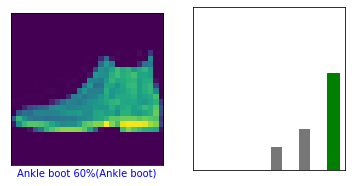

In [80]:
i =0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predict, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predict, test_labels)
plt.show()

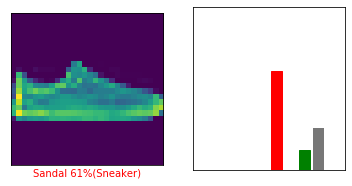

In [81]:
i =12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predict, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predict, test_labels)
plt.show()

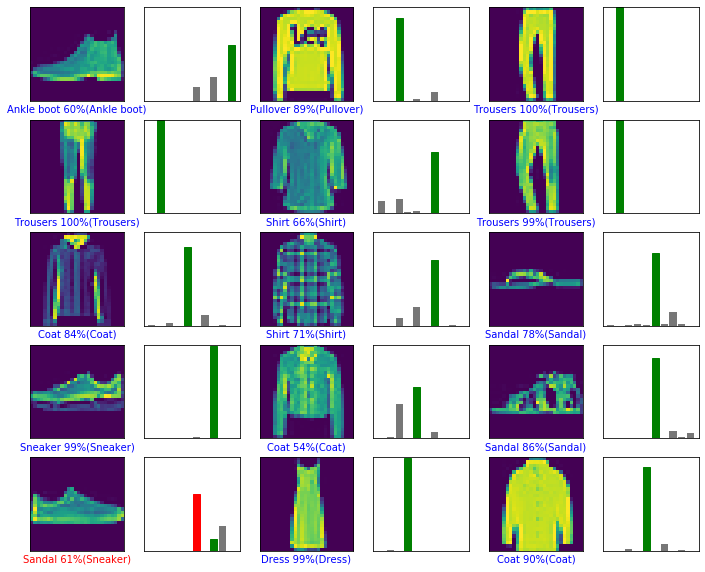

In [101]:
num_rows=5
num_cols=3
num_image = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_image):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i, predict, test_labels, test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i, predict, test_labels)
plt.show()
    